In [1]:
import cv2
from augraphy import *
import matplotlib.pyplot as plt

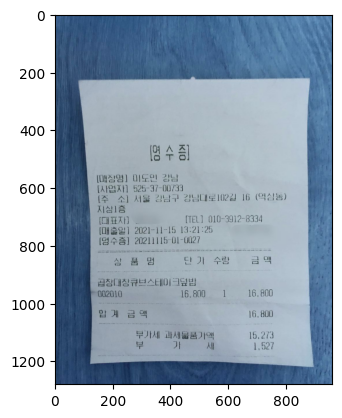

In [2]:
image = cv2.imread("/data/ephemeral/home/datasets/images/test/drp.en_ko.in_house.selectstar_004148.jpg")
plt.imshow(image)

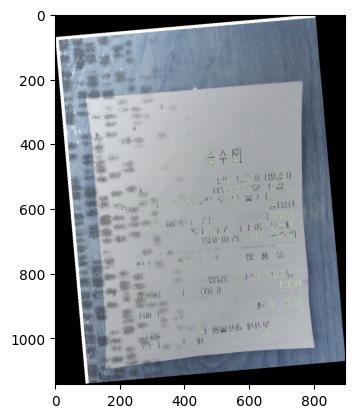

In [3]:
pipeline = default_augraphy_pipeline()
aug = pipeline(image=image)
plt.imshow(aug)

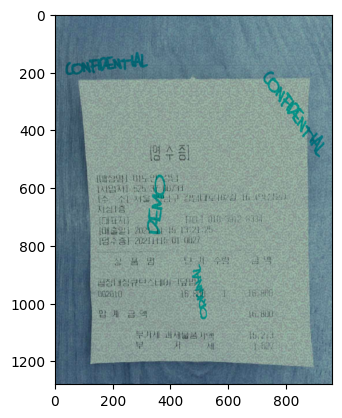

In [4]:
import random

ink_phase = [

    InkBleed(
        intensity_range=(0.5, 0.6),
        kernel_size=random.choice([(5, 5), (3, 3)]),
        severity=(0.2, 0.4),
        p=0.33,
    ),
    OneOf(
        [
            InkShifter(
                text_shift_scale_range=(18, 27),
                text_shift_factor_range=(1, 4),
                text_fade_range=(0, 2),
                blur_kernel_size=(5, 5),
                blur_sigma=0,
                noise_type="random",
            )
        ],
        p=1.0,
    ),
]

paper_phase = [

    ColorPaper(
        hue_range=(0, 255),
        saturation_range=(10, 40),
        p=0.33,
    ),
            OneOf(
        [

            PatternGenerator(
                imgx=random.randint(256, 512),
                imgy=random.randint(256, 512),
                n_rotation_range=(10, 15),
                color="random",
                alpha_range=(0.25, 0.5),
            ),
        ],
        p=0.5,
    ),
    AugmentationSequence(
        [
            BrightnessTexturize(
                texturize_range=(0.9, 0.99),
                deviation=0.03,
            ),
        ],
    ),
]

post_phase = [
    Jpeg(
        quality_range=(25, 95),
        p=0.33,
    ),

    OneOf(
        [
            Markup(
                num_lines_range=(1, 3),
                markup_length_range=(0.5, 1),
                markup_thickness_range=(1, 2),
                markup_type='highlight',
                markup_color="random",
                single_word_mode=False,
                repetitions=1,
            ),
            Scribbles(
                scribbles_type="random",
                scribbles_location="random",
                scribbles_size_range=(250, 600),
                scribbles_count_range=(1, 6),
                scribbles_thickness_range=(1, 3),
                scribbles_brightness_change=[32, 64, 128],
                scribbles_text="random",
                scribbles_text_font="random",
                scribbles_text_rotate_range=(0, 360),
                scribbles_lines_stroke_count_range=(1, 6),
            ),
        ],
        p=1.0,
    )
]

pipeline = AugraphyPipeline(ink_phase=ink_phase, paper_phase=paper_phase, post_phase=post_phase)

image_augmented = pipeline(image)

plt.imshow(image_augmented)

In [5]:
import json

In [6]:
# Load the JSON data
with open('/data/ephemeral/home/datasets/jsons/train.json', 'r') as json_file:
    data = json.load(json_file)
print(type(data))
print(data.keys())

<class 'dict'>
dict_keys(['images'])


In [8]:
data['images']['drp.en_ko.in_house.selectstar_000003.jpg'].keys()

dict_keys(['words', 'img_w', 'img_h'])

In [9]:
len(data['images'])

3272

In [10]:
from PIL import Image
from tqdm import tqdm
pipeline = AugraphyPipeline(ink_phase=ink_phase, paper_phase=paper_phase, post_phase=post_phase)

origin_base_path = '/data/ephemeral/home/datasets/images/train/'

origin_img = list(data['images'].keys())


for image_path in tqdm(origin_img):
    total_path = origin_base_path + image_path 
    image = cv2.imread(total_path)

    aug_img = pipeline(image)
    
    aug_img = Image.fromarray(aug_img)
    
    download_path = origin_base_path + "augraphy." + image_path
    aug_img.save(download_path)

    json_key = "augraphy." + image_path
    data['images'][json_key] = data['images'][image_path]


print(len(data['images']))     
    

100%|██████████| 3272/3272 [44:23<00:00,  1.23it/s]

6544


In [11]:
# File path to save JSON data
file_path = "/data/ephemeral/home/datasets/jsons/aug_train.json"

# Save dictionary to JSON file
with open(file_path, "w") as json_file:
    json.dump(data, json_file)